# PHYS 447B: Orbital Mechanics
## Homework 4

Shelby Quiring, 10157162, Jan 25th 2023

Questions: 4.1, 4.3, 4.5, 4.8

In [2]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt

### `Question 4.1`

Find the orbital elements of a geocentric satellite whose inertial position and velocity vectors in a geocentric equatorial frame are:

\begin{gather}
\textbf{r} = 2615 \hat{I} + 15 881 \hat{J} + 3980 \hat{K} \ (km) \\
\textbf{v} = −2.767 \hat{I} − 0.7905 \hat{J} + 4.980 \hat{K} \ (km/s)
\end{gather}

{Ans.: e = 0.3760, h = 95 360 km2/s, i = 63.95◦, $\Omega$ = 73.71◦, ω = 15.43◦, θ = 0.06764◦}


#### Answer 4.1

To solve this problem, we take the following steps, as outlined in section 4.4 of the textbook 'Orbital Mechanics for Engineering Students' by Howard Curtis:

1. Calculate the magnitude of the position and velocity, $r$ and $v$, as the magnitude of each vector.

2. Calculate the radial velocity $v_r = \mathbf{r} \cdot \mathbf{v}/r$. If radial velocity is positive the satellite is flying away from perigee, while if it is negative the satellite flies towards perigee.

3. Calculate the specific angular momentum, $\mathbf{h} = \mathbf{r} + \mathbf{v}$.

4. Calculate the inclination, $i = \cos^{-1}{(\frac{h_z}{h})}$.

5. Calculate the node line vector, $N = \mathbf{\hat{k}} \times \mathbf{h}$, and its magnitude.

6. Calculate the right ascension of the ascending node, $\Omega = \cos^{-1}{(\frac{N_x}{N})}$

7. Calculate the eccentricity vector and its magnitude, $\mathbf{e} = \frac{1}{\mu} [(v^2 - \frac{\mu}{r})\mathbf{r}-rv_r\mathbf{v}]$.

8. Calculate the argument of perigee, $\omega = \cos^{-1}({\mathbf{N \cdot e}/Ne)}$.

9. Calculate the true anomaly, $\theta = \cos^{-1}{(\frac{\mathbf{e \cdot r}}{er})}$

The approach described above is generalized into a function for future work below:

In [13]:
# Answer 4.1

G = 6.67e-11
Me = 5.9e24
mu = G*Me

def coe_from_sv(rvec, vvec, mu):
    rvec = np.array(rvec)
    vvec = np.array(vvec)
    # Caculate magnitude of position and velocity
    r = np.linalg.norm(rvec)
    v = np.linalg.norm(vvec)

    # Calculate radial velocity
    vr = np.dot(rvec, vvec) / r

    # Calculate angular momentum 
    hvec = np.cross(rvec, vvec)
    h = np.linalg.norm(hvec)

    # Calculate inclination
    i = np.arccos(hvec[-1]/h)

    # Calculate node line vector
    nvec = np.cross([0, 0, 1], hvec)
    n = np.linalg.norm(nvec)

    # Calculate right ascenscion of ascending node
    if n != 0:
        omega = np.arccos(nvec[0]/n)
        if nvec[1] < 0:
            omega = 2*np.pi - omega
    else:
        omega = 0
        
    # Calculate eccentricity
    evec = 1/mu * ((v**2 - mu/r) * rvec - r*vr*vvec)
    e = np.linalg.norm(evec)

    # Calculate argument of perigee
    if n != 0:
        w = np.arccos(np.dot(nvec, evec)/(n*e))
        if evec[-1] < 0:
            w = 2*np.pi - w
    else:
        w = 0

    # Calculate true anomaly
    theta = np.arccos(np.dot(evec, rvec)/(e*r))
    if vr < 0:
        theta = 2*np.pi - theta


    return h, e, omega, i, w, theta


h, e, omega, i, w, theta = coe_from_sv([2615e3, 15881e3, 3980e3], [-2767, -790.5, 4980], mu)

print(f'Angular Momentum: {np.round(h*1e-6)} [km^2/s]')
print(f'Eccentricity: {np.round(e, 4)}')
print(f'RAAN: {np.round(omega * 180/np.pi, 4)} [deg]')
print(f'Inclination: {np.round(i * 180/np.pi, 4)} [deg]')
print(f'Argument of Perigee: {np.round(w * 180/np.pi, 4)} [deg]')
print(f'True Anomaly: {np.round(theta * 180/np.pi, 4)} [deg]')

Angular Momentum: 95360.0 [km^2/s]
Eccentricity: 0.3937
RAAN: 73.7073 [deg]
Inclination: 63.9517 [deg]
Angular Momentum: 15.4319 [deg]
Angular Momentum: 0.0654 [deg]


### `Question 4.3`

At time to the position $\textbf{r}$ and velocity $\textbf{v}$ of a satellite in the geocentric equatorial frame are:

\begin{gather}
\textbf{r} = 6472.7 \hat{I} − 7470.8 \hat{J} − 2469.8 \hat{K} \ (km) \\
\textbf{v} = 3.9914 \hat{I} + 2.7916 \hat{J} − 3.2948 \hat{K} \ (km/s)
\end{gather}

Find the orbital elements.

{Ans.: h = 58 461 km2/s,e = 0.2465, $\Omega$ = 110◦, ω = 75◦, θ = 130◦, i = 35◦}

#### Answer 4.3

We use the implementation of the dunction defined in Answer 4.1 below.

In [14]:
# Answer 4.3

h, e, omega, i, w, theta = coe_from_sv([6472.7e3, -7470.8e3, -2469.8e3], 
                                       [3991.4, 2791.6, -3294.8], mu)

print(f'Angular Momentum: {np.round(h*1e-6)} [km^2/s]')
print(f'Eccentricity: {np.round(e, 4)}')
print(f'RAAN: {np.round(omega * 180/np.pi, 4)} [deg]')
print(f'Inclination: {np.round(i * 180/np.pi, 4)} [deg]')
print(f'Argument of Perigee: {np.round(w * 180/np.pi, 4)} [deg]')
print(f'True Anomaly: {np.round(theta * 180/np.pi, 4)} [deg]')

Angular Momentum: 58461.0 [km^2/s]
Eccentricity: 0.2416
RAAN: 109.9996 [deg]
Inclination: 35.0 [deg]
Argument of Perigee: 77.337 [deg]
True Anomaly: 127.6634 [deg]


### `Question 4.5`

Given that, relative to the geocentric equatorial frame:
\begin{gather}
\textbf{r} = −6634.2 \hat{I} − 1261.8 \hat{J} − 5230.9 \hat{K} \ (km)
\end{gather}

the eccentricity vector is:

\begin{gather}
e = −0.40907 \hat{I} − 0.48751 \hat{J} − 0.63640 \hat{K} 
\end{gather}

and the satellite is flying towards perigee, calculate the inclination of the orbit.

{Ans.: 69.3◦}

#### Answer 4.5

To calculate inclination we must calculate the angular momentum vector. We know 2 things:

1. The direction of the angular momentum vector is normal to both the eccentricity and position vectors:

\begin{equation}
\hat{h} = \pm \hat{r} \times \hat{e}
\end{equation}


In [16]:
# Answer 4.5

rvec = np.array([-6634.2e3, -1261.8e3, -5230.9e3])
evec = np.array([-0.40907, -0.48751, -0.63640])

r = np.linalg.norm(rvec)
e = np.linalg.norm(evec)

h_hat = np.cross(rvec, evec) / (r*e)
i = np.arccos(h_hat[-1])

print(f'Inclination: {np.round(i * 180/np.pi, 4)} [deg]')

Inclination: 69.2953 [deg]


### `Question 4.8`

Calculate the transformation matrix [Q] for the sequence of two rotations: 
α = 40◦ about the positive X axis, followed by β = 25◦ about the positive y' axis. The result is that the XYZ axes are rotated into the x''y'
z'' axes.

<center>

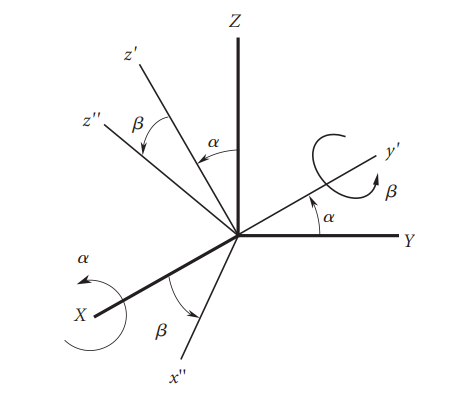 <br>
**Fig:** Rotated Axes
</center>


{Partial ans.: Q11 = 0.9063 Q12 = 0.2716 Q13 = −0.3237}

#### Answer 4.8

We can construct the total transformation matrix $Q_{tot}$ as the product of 2 rotation matricies $Q_{\alpha}$ and $Q_{\beta}$:

\begin{equation}
Q_{tot} = Q_{\beta}Q_{\alpha}
\end{equation}

\begin{equation}
Q_{\alpha} = 
\begin{bmatrix}
1 & 0 & 0 \\
0 & \cos{\alpha} & -\sin{\alpha} \\
0 & \sin{\alpha} & \cos{\alpha} \\
\end{bmatrix}
\end{equation}

\begin{equation}
Q_{\beta} = 
\begin{bmatrix}
\cos{\alpha} & 0 & \sin{\alpha} \\
0 & 1 & 0 \\
-\sin{\alpha} & 0 & \cos{\alpha}
\end{bmatrix}
\end{equation}

In [22]:
# Answer 4.8

alpha = 40 * np.pi / 180
beta = 25 * np.pi / 180

Qa = np.array([[1, 0, 0], [0, np.cos(alpha), -np.sin(alpha)], [0, np.sin(alpha), np.cos(alpha)]])
Qb = np.array([[np.cos(beta), 0, np.sin(beta)], [0, 1, 0], [-np.sin(alpha), 0, np.cos(alpha)]])

Qt = np.matmul(Qb, Qa)

print(f'Qt:\n{Qt}')


Qt:
[[ 0.90630779  0.27165378  0.32374437]
 [ 0.          0.76604444 -0.64278761]
 [-0.64278761  0.49240388  0.58682409]]
